# Download artist images

We want images of faces for rap, rock, and country artists.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import json
import time
import re
from collections import Counter
import pickle
import cv2
import wikipedia
from google_images_download import google_images_download

In [2]:
# Change the Matplotlib defaults
colors = np.array([(182,109,255),(218,109,0),(0,146,146)])/255
plt.rcParams.update({'font.size': 16, 'figure.figsize': (12.0, 6.0)})
plt.style.use('seaborn')
%matplotlib inline

# Collect lists of artist names from various sources

## Get artist names from Wikipedia

In [3]:
import requests
from bs4 import BeautifulSoup

In [133]:
categories = ["Category:American_female_country_singers",
              "Category:American_male_rappers",
              "Category:American_female_rappers"]

In [135]:
# Provide the content category and starting URL
root = "https://en.wikipedia.org"
artist_names = {}
total = 0
for category in categories:
    print(cj
          ategory)
    url = f"{root}/wiki/{category}"
    key = category.split(":")[-1].lower()

    # Start searching through pages
    reached_last_page = False
    while not reached_last_page:
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')

        # Find the names on the page
        letter_groups = soup.find_all(class_="mw-category-group")[1:]
        for group in letter_groups:
            names_in_group = list(map(lambda x: x.text, group.find_all("li")))
            names_in_group = [name for name in names_in_group if not name.startswith("►")]
            total += len(names_in_group)
            artist_names.setdefault(key, []).extend(names_in_group)
        print(names_in_group[-4:])

        # Find the link to the next page
        prev_next_links = soup.find_all(title=category.replace("_", " "))
        if prev_next_links and "next" in prev_next_links[-1].text:
            prev_next_links = prev_next_links[-1]
            url = root + prev_next_links.get("href") # URL for the next page
        else:
            print("Reached the last page.")
            reached_last_page = True
        time.sleep(0.5)
print(f"Found {total} total names.")

Category:American_rock_singers
['Marty Casey', 'Cassidy (musician)', 'Felix Cavaliere', 'Matthew Caws']
['Jay Farrar', 'Jimmy Farrar', 'Perry Farrell', 'Charlie Farren']
['David Ippolito', 'Donnie Iris', 'Iron & Wine', 'Jason Isbell']
['Denise McCann', 'Linda McCartney', 'Mac McCaughan', 'Scott McCaughey']
['Dan Reynolds (singer)', 'Slater Rhea', 'Emitt Rhodes', 'Don Rich (swamp pop singer)']
['Ben Taylor (musician)', 'Chris Taylor (Christian rock musician)', 'Chris Taylor (Grizzly Bear musician)', 'James Taylor']
['Frank Zappa', 'Zarah (television personality)', 'Regina Zernay Roberts', 'Warren Zevon']
Reached the last page.
Category:American_female_rock_singers
['Naomi Yang', 'Cori Yarckin', 'Yulianna']
Reached the last page.
Category:American country singers
['Stuart Duncan', 'Tommy Duncan', 'Ronnie Dunn', 'Bobby Durham (country musician)']
['Ed Hill', 'Chris Hillman', 'Jimbeau Hinson', 'Unknown Hinson']
['Brad Martin', 'Grady Martin', 'Greg Martin (musician)', 'Jimmy Martin']
['Cha

## Female rock singers

In [139]:
category = "List_of_female_rock_singers"
root = "https://en.wikipedia.org"
url = f"{root}/wiki/{category}"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
ul = soup.find_all("ul")
names = []
for section in ul[1:26]:
    names.extend(map(lambda x: x.text, section.find_all("li")))
artist_names.setdefault("female_rock_singers", []).extend(names)

## Male rock singers

In [141]:
url = "https://digitaldreamdoor.com/pages/best_vocalists.html"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all("table", class_="t7")[0]
columns = table.find_all("td", class_="td16a")
names = []
for column in columns:
    names.extend(list(map(lambda x: x.split(".")[-1].strip(), column.text.strip().split("\n"))))
artist_names.setdefault("male_rock_singers", []).extend(names)    

## Male country singers

In [179]:
url = "https://www.countrystartpage.com/music-directory/male/"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
div = soup.find(class_="uk-margin-remove-top uk-grid-margin uk-margin-remove-top")
names = [item.text.split("/")[0].strip() for item in div.find_all("li")]
artist_names.setdefault("male_country_singers", []).extend(names)

# Combine the different name sources

In [53]:
# Provide the content category and starting URL
# category = "Category:American_female_country_singers"
category = "Category:American_female_rock_singers"
# category = "List_of_female_rock_singers"
root = "https://en.wikipedia.org"
url = f"{root}/wiki/{category}"

# Start searching through pages
names = []
reached_last_page = False
while not reached_last_page:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Find the names on the page
    letter_groups = soup.find_all(class_="mw-category-group")[1:]
    for group in letter_groups:
        names.extend(map(lambda x: x.text, group.find_all("li")))
    print(names[-4:])

    # Find the link to the next page    
    previous_next_links = soup.find_all(title=category.replace("_", " "))[-1]
    if "next" in previous_next_links.text:
        url = root + previous_next_links.get("href") # URL for the next page
    else:
        print("Reached the last page.")
        reached_last_page = True
    time.sleep(0.5)

['Chelsea Wolfe', 'Naomi Yang', 'Cori Yarckin', 'Yulianna']


IndexError: list index out of range

# google_images_download

https://google-images-download.readthedocs.io/en

In [3]:
response = google_images_download.googleimagesdownload()

Jay-Z


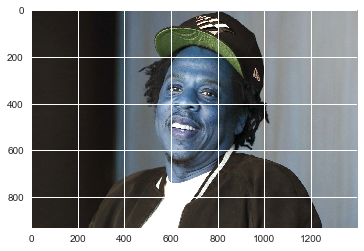

In [6]:
artist_names = ["Jay-Z"]
output_dir = "./face_image_downloads"
for n, query in enumerate(artist_names):
    prefix = query.replace(" ", "_")
    args = {"keywords": query, "limit": 1, "prefix": prefix, "silent_mode": True,
            "output_directory": output_dir, "no_directory": True, "delay": 2,
            "save_source": "face_image_urls", "print_urls": False}
    image_path = response.download(args)
    if n % 10 == 0 or True:
        print(query)
        path = image_path[0][query][0]
        image = cv2.imread(path)
        plt.imshow(image)
        plt.show()